# Predicting Home Value
Due to our dataset find, our team has changed our scope from predicting home features to predicting home price using different statistical approaches. Together we will trial and error multiple algorithms and explore there utility in predicting home prices. Across these different algorithms we will use similar metrics such as MSE to determine the relative success of the model.

## Our Scope
A real estate investment firm has tasked our Group1 consulting team to develop a model to predict home prices based on a set of given parameters. Obviously we know location is the biggest idicator of home prices, but our team will use a combination of other home features to figure out the value of a home

## Our Data
We will be using the a publically availble dataset from Kaggle. The data contained in the set Austin, TX House Listings. It was scraped in January 2021 and is highly ranked on Kaggle for being clean and usable. Below is the link to the dataset.
https://www.kaggle.com/datasets/ericpierce/austinhousingprices?resource=download

# Familiarizing with Dataset

In [1]:
# import pandas for EDA
import pandas as pd

In [2]:
file_path = 'austinHousingData.csv'
df = pd.read_csv(file_path)
df.head(3)

,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,...,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,homeImage
0,111373431,pflugerville,14424 Lake Victor Dr,78660,"14424 Lake Victor Dr, Pflugerville, TX 78660 i...",30.430632,-97.663078,1.98,2,True,...,1,1,1.266667,2.666667,1063,14,3.0,4,2,111373431_ffce26843283d3365c11d81b8e6bdc6f-p_f...
1,120900430,pflugerville,1104 Strickling Dr,78660,Absolutely GORGEOUS 4 Bedroom home with 2 full...,30.432672,-97.661697,1.98,2,True,...,1,1,1.400000,2.666667,1063,14,2.0,4,1,120900430_8255c127be8dcf0a1a18b7563d987088-p_f...
2,2084491383,pflugerville,1408 Fort Dessau Rd,78660,Under construction - estimated completion in A...,30.409748,-97.639771,1.98,0,True,...,1,1,1.200000,3.000000,1108,14,2.0,3,1,2084491383_a2ad649e1a7a098111dcea084a11c855-p_...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15171 entries, 0 to 15170
Data columns (total 47 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   zpid                        15171 non-null  int64  
 1   city                        15171 non-null  object 
 2   streetAddress               15171 non-null  object 
 3   zipcode                     15171 non-null  int64  
 4   description                 15171 non-null  object 
 5   latitude                    15171 non-null  float64
 6   longitude                   15171 non-null  float64
 7   propertyTaxRate             15171 non-null  float64
 8   garageSpaces                15171 non-null  int64  
 9   hasAssociation              15171 non-null  bool   
 10  hasCooling                  15171 non-null  bool   
 11  hasGarage                   15171 non-null  bool   
 12  hasHeating                  15171 non-null  bool   
 13  hasSpa                      151

As you can see from the initial info() method, the dataset itself is very clean and usable. There isn't much data pre-processing needed in order to clean the data since there are no null values, and the majority of features are in a usable format.

### Dropping non-int and changing booleans
The only pre-processing we will need to do is to drop any d-type that is not an integer, like columns city, streetAddress, and description. We still have longitute and latitude so location is still within the dataset. Also we want to change the true and false values to 1's and 0's to make the entire dataset numerical.

In [4]:
#Droping the columns that are strings
col_drop_list = ['city', 'streetAddress', 'description', 'homeType','latest_saledate', 'latestPriceSource', 'homeImage' ]
df = df.drop(col_drop_list, axis=1)

df.shape

(15171, 40)

In [5]:
#Changing bool to int
col_bool_list = ['hasAssociation', 'hasCooling', 
                 'hasGarage', 'hasHeating', 'hasSpa', 'hasView']

for col in col_bool_list:
    name = col + '_int'
    df[name] = df[col].astype(int)

df.shape

(15171, 46)

In [6]:
df.hasAssociation_int.value_counts()

1    8007
0    7164
Name: hasAssociation_int, dtype: int64

In [7]:
#Drop the bool columns
df = df.drop(col_bool_list, axis=1)
df.shape

(15171, 40)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15171 entries, 0 to 15170
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   zpid                        15171 non-null  int64  
 1   zipcode                     15171 non-null  int64  
 2   latitude                    15171 non-null  float64
 3   longitude                   15171 non-null  float64
 4   propertyTaxRate             15171 non-null  float64
 5   garageSpaces                15171 non-null  int64  
 6   parkingSpaces               15171 non-null  int64  
 7   yearBuilt                   15171 non-null  int64  
 8   latestPrice                 15171 non-null  int64  
 9   numPriceChanges             15171 non-null  int64  
 10  latest_salemonth            15171 non-null  int64  
 11  latest_saleyear             15171 non-null  int64  
 12  numOfPhotos                 15171 non-null  int64  
 13  numOfAccessibilityFeatures  151

Now the data should be cleaned, all numeric, and ready to be used in the analysis.

In [9]:
df['longitude']

0       -97.663078
1       -97.661697
2       -97.639771
3       -97.661659
4       -97.656860
           ...    
15166   -97.816345
15167   -97.772835
15168   -97.761124
15169   -97.717789
15170   -97.701523
Name: longitude, Length: 15171, dtype: float64

## Analysis
In this lineal regression model We will work all features.

#### Check corelation with latestPrice

In [10]:
df.corr()['latestPrice']

zpid                          0.007503
zipcode                      -0.145946
latitude                      0.071547
longitude                    -0.184079
propertyTaxRate              -0.062179
garageSpaces                  0.157443
parkingSpaces                 0.156811
yearBuilt                     0.059692
latestPrice                   1.000000
numPriceChanges               0.038305
latest_salemonth              0.033898
latest_saleyear               0.059942
numOfPhotos                   0.154355
numOfAccessibilityFeatures    0.016270
numOfAppliances               0.033114
numOfParkingFeatures          0.098384
numOfPatioAndPorchFeatures    0.087936
numOfSecurityFeatures         0.058349
numOfWaterfrontFeatures       0.123979
numOfWindowFeatures           0.056141
numOfCommunityFeatures       -0.001334
lotSizeSqFt                   0.020940
livingAreaSqFt                0.467034
numOfPrimarySchools          -0.170927
numOfElementarySchools        0.155988
numOfMiddleSchools       

We dont have multicollinearity

#### Display distribution

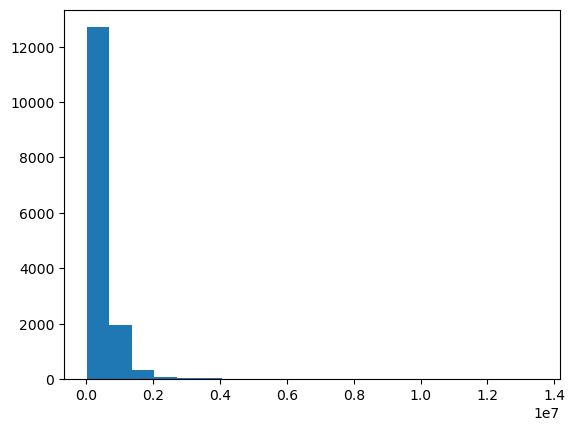

In [11]:
import matplotlib.pyplot as plt
plt.hist(df['latestPrice'], bins=20)
plt.show()

WE can see that most of the houses have a price below 2,000,000. we have an asymmetric distribution

WE have two options:
1. we will delete outliers
2. we could apply a logarithmic function

In [12]:
import numpy as np

upper = np.percentile(df.latestPrice, 98)
lower = np.percentile(df.latestPrice, 2)

print('Middle 95 are values between {} and {}'.format(lower, upper))

Middle 95 are values between 165000.0 and 1695000.0


In [13]:
df = df.drop(df[df['latestPrice'] < lower].index)
df = df.drop(df[df['latestPrice'] > upper].index)
df.shape

(14582, 40)

In [14]:
#df = df.sort_values(by='latestPrice', ascending= False)

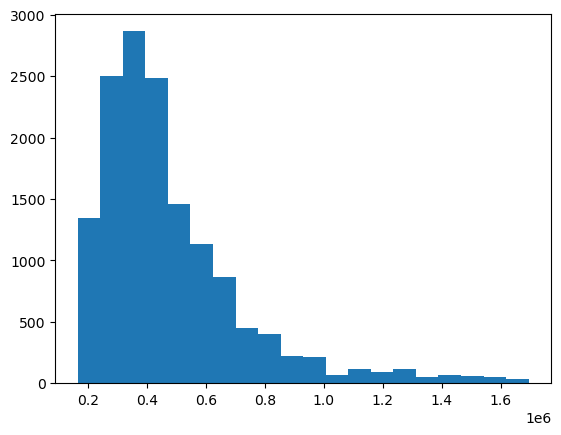

In [16]:
plt.hist(df['latestPrice'], bins=20)
plt.show()

WE can see that our distribution is asymmetric, then we will apply logarithmic function

In [17]:
from sklearn.preprocessing import FunctionTransformer

transformer = FunctionTransformer(np.log1p, validate=True)
df_log = transformer.transform(df)

C:\Users\gyanezarvizu\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(
C:\Users\gyanezarvizu\Anaconda3\lib\site-packages\sklearn\preprocessing\_function_transformer.py:205: RuntimeWarning: invalid value encountered in log1p
  return func(X, **(kw_args if kw_args else {}))


In [18]:
columns_names = df.columns

df_log = pd.DataFrame(df_log, columns= columns_names)
df_log.head(3)

,zpid,zipcode,latitude,longitude,propertyTaxRate,garageSpaces,parkingSpaces,yearBuilt,latestPrice,numPriceChanges,...,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,hasAssociation_int,hasCooling_int,hasGarage_int,hasHeating_int,hasSpa_int,hasView_int
0,18.528399,11.272903,3.447783,NaN,1.091923,1.098612,1.098612,7.607381,12.628070,1.791759,...,2.70805,1.386294,1.609438,1.098612,0.693147,0.693147,0.693147,0.693147,0.0,0.0
1,18.610478,11.272903,3.447848,NaN,1.091923,1.098612,1.098612,7.607878,12.594734,0.693147,...,2.70805,1.098612,1.609438,0.693147,0.693147,0.693147,0.693147,0.693147,0.0,0.0
2,21.457791,11.272903,3.447118,NaN,1.091923,0.000000,0.000000,7.610358,12.453425,0.693147,...,2.70805,1.098612,1.386294,0.693147,0.693147,0.693147,0.000000,0.693147,0.0,0.0


In [47]:
df_log.corr()['latestPrice']

zpid                         -0.012378
zipcode                      -0.171102
latitude                      0.118074
propertyTaxRate              -0.053848
garageSpaces                  0.154884
parkingSpaces                 0.153578
yearBuilt                    -0.012629
latestPrice                   1.000000
numPriceChanges               0.021069
latest_salemonth              0.056425
latest_saleyear               0.100460
numOfPhotos                   0.118610
numOfAccessibilityFeatures    0.032753
numOfAppliances               0.053909
numOfParkingFeatures          0.123274
numOfPatioAndPorchFeatures    0.133111
numOfSecurityFeatures         0.097099
numOfWaterfrontFeatures       0.038875
numOfWindowFeatures           0.109538
numOfCommunityFeatures        0.014434
lotSizeSqFt                   0.368627
livingAreaSqFt                0.570899
numOfPrimarySchools          -0.167226
numOfElementarySchools        0.146626
numOfMiddleSchools            0.108272
numOfHighSchools         

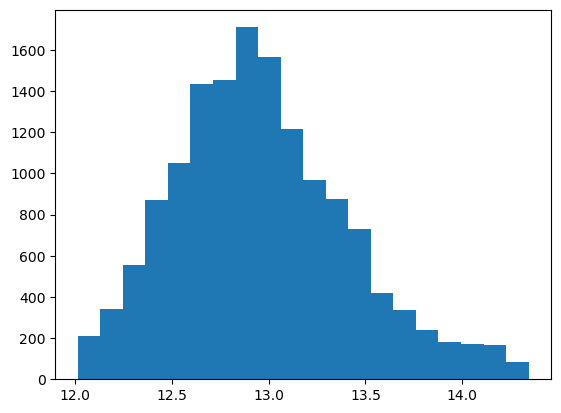

In [19]:
plt.hist(df_log['latestPrice'], bins=20)
plt.show()

In [20]:
# Check if we have NaN
df_log.isna().any()

zpid                          False
zipcode                       False
latitude                      False
longitude                      True
propertyTaxRate               False
garageSpaces                  False
parkingSpaces                 False
yearBuilt                     False
latestPrice                   False
numPriceChanges               False
latest_salemonth              False
latest_saleyear               False
numOfPhotos                   False
numOfAccessibilityFeatures    False
numOfAppliances               False
numOfParkingFeatures          False
numOfPatioAndPorchFeatures    False
numOfSecurityFeatures         False
numOfWaterfrontFeatures       False
numOfWindowFeatures           False
numOfCommunityFeatures        False
lotSizeSqFt                   False
livingAreaSqFt                False
numOfPrimarySchools           False
numOfElementarySchools        False
numOfMiddleSchools            False
numOfHighSchools              False
avgSchoolDistance           

In [21]:
df_log = df_log.drop('longitude', axis=1)

### Creating testing and training data
In this next step we will be creating the testing and training data for our algorithm. 

In [22]:
# Getting column names
column_names=df_log.columns.tolist()
type(column_names)

list

In [23]:
# Deleting the name of the dependent name 'latestPrice'
column_names.remove('latestPrice')

In [24]:
# Independent values
X = df_log[column_names]

# Dependent values
y = df_log['latestPrice']

In [25]:
# importing train_test_split to create testing and trainin data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Comparing size of X sets
print(X.shape, X_train.shape, X_test.shape)

(14582, 38) (11665, 38) (2917, 38)


### Apply linear regression with sklearn

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
lr = LinearRegression()

In [29]:
lr.fit(X_train, y_train)

LinearRegression()

In [30]:
prediction_test = lr.predict(X_test)

In [31]:
from sklearn.metrics import r2_score
r_squared = r2_score(y_test, prediction_test)
r_squared

0.6371341404340931

#### Coeffincient of determination is 0.637, the better is close to 1
this model is explaining only the 63.7% of data

### Linear regression with StatsModels

In [32]:
import statsmodels.api as sm

In [33]:
# Creating the model
model = sm.OLS(endog=y_train, exog=sm.add_constant(X_train))

In [34]:
# Get model results
results = model.fit()

In [35]:
# Displey results summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            latestPrice   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     515.1
Date:                Thu, 27 Jul 2023   Prob (F-statistic):               0.00
Time:                        16:20:41   Log-Likelihood:                -1488.6
No. Observations:               11665   AIC:                             3055.
Df Residuals:                   11626   BIC:                             3342.
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

#### Coeffincient of determination is 0.627, the better is close to 1
this model is explaining only the 62.7% of data

### Evaluation

In [36]:
# Get prediction with X_train using the model
y_train_pred = results.predict(sm.add_constant(X_train))
y_train_pred.shape

(11665,)

In [44]:
# RMSE
from sklearn.metrics import mean_squared_error
RMSE_train=mean_squared_error(np.expm1(y_train), np.expm1(y_train_pred), squared=False)
RMSE_train

165555.50238644637

Our model is off by about 165555 dollars in a given prediction



In [38]:
# Get prediction with X_train using the model
y_test_pred = results.predict(sm.add_constant(X_test))

In [45]:
RMSE_test=mean_squared_error(np.expm1(y_test), np.expm1(y_test_pred), squared=False)
RMSE_test

158323.2704518954

In [46]:
# as long as the difference is small the model is consistent
diff = (-RMSE_test + RMSE_train)/ RMSE_test *100
diff

4.56801575277489